In [18]:
import numpy as np
import os
import matplotlib.pyplot as plt

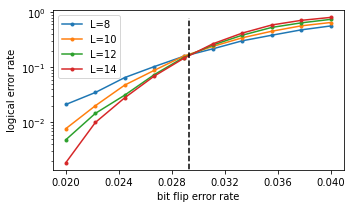

In [63]:
repeat = 8
L_list = [8,10,12,14]

plt.figure(1,figsize=(5,3))
for L in L_list:
    first = True
    for i_rep in range(repeat):
        fname = "data_ftcs/" + "L_%d_i_%d.npz" % (L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            pz_list, fail_prob_z, Nrep = npz_file['pz_list'], npz_file['fail_prob_z'], npz_file['Nrep']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(pz_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep
    # plt.plot(pz_list,fail_prob_avg/Ntot,".-", label="L=%d, N=%d" % (L,Ntot))
    plt.plot(pz_list,fail_prob_avg/Ntot,".-", label="L=%d" % (L))


plt.plot([0.0293,0.0293],[0,0.8],"k--")
plt.xticks(np.arange(0.02,0.041,0.004))
plt.yscale("log")
plt.xlabel("bit flip error rate")
plt.ylabel("logical error rate")
plt.legend()
plt.tight_layout()
plt.savefig("figs/fcts-threshold.pdf")
plt.show()